In [1]:
%matplotlib inline
import sys
sys.path.append("../")
import numpy
from matplotlib import pyplot
from rl_book_gym.envs.racetrack import Env, Action, Reward

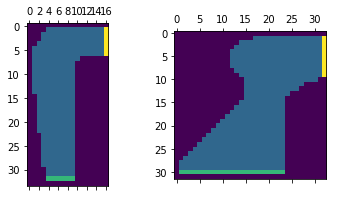

In [2]:
%matplotlib inline
import numpy
from matplotlib import pyplot
fig = pyplot.figure(figsize=(6,3))
ax = fig.add_subplot(1, 2, 1)
ax.matshow(numpy.loadtxt("../asset/map-ex5-11-1.csv", delimiter=","))
ax = fig.add_subplot(1, 2, 2)
ax.matshow(numpy.loadtxt("../asset/map-ex5-11-2.csv", delimiter=","))

In [3]:
from IPython.display import display
env = Env("../asset/map-ex5-11-1.csv")

[pos-x, pos-y, vel-x, vel-y] =  [32  7  0  0]


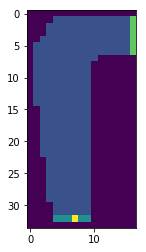

In [4]:
obs = env.reset()
pyplot.imshow(env.render(mode="rgb_array"))
print("[pos-x, pos-y, vel-x, vel-y] = ", obs)

[pos-x, pos-y, vel-x, vel-y] =  [31  7 -1  0]
reward =  -1


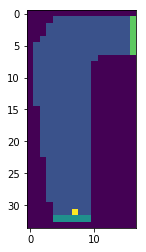

In [5]:
obs, reward, done, info = env.step([Action.down, Action.keep])
pyplot.imshow(env.render(mode="rgb_array"))
print("[pos-x, pos-y, vel-x, vel-y] = ", obs)
print("reward = ", int(reward))

[pos-x, pos-y, vel-x, vel-y] =  [29  7 -2  0]
reward =  -1


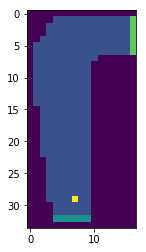

In [6]:
obs, reward, done, info = env.step([Action.down, Action.keep])
pyplot.imshow(env.render(mode="rgb_array"))
print("[pos-x, pos-y, vel-x, vel-y] = ", obs)
print("reward = ", int(reward))

In [76]:
class MonteCarloControler:
    def __init__(self, actions, behaviour_policy=None):
        self.value_dict = dict()
        self.sum_weight_dict = dict()
        self.eps = 0.1
        self.discount = 0.9
        self.actions = actions
        if behaviour_policy is None:
            self.behaviour_policy = self.eps_greedy_policy

    def init_if_unseen(self, state):
        # TODO: reconsider the initial value
        if state not in self.value_dict:
            self.value_dict[state] = dict()
            self.sum_weight_dict[state] = dict()
        for action in actions:
            if action not in self.value_dict[state]:
                self.value_dict[state][action] = 0
                self.sum_weight_dict[state][action] = 0
        
    def update_step(self, state, action, cumsum_reward, weight):
        self.init_if_unseen(state)
        self.sum_weight_dict[state][action] += weight
        scale = weight / self.sum_weight_dict[state][action]
        diff = cumsum_reward - self.value_dict[state][action]
        self.value_dict[state][action] += scale * diff

    def update_episode(self, env):
        obs = env.reset()
        done = False
        goal = False
        cumsum_reward = 0.0
        weight = 1
        while not done:
            prev_obs = tuple(obs)
            b_act, b_prob = self.behaviour_policy(prev_obs)
            obs, reward, done, info = env.step(b_act)
            obs = tuple(obs)
            cumsum_reward = reward + self.discount * cumsum_reward
            self.update_step(prev_obs, b_act, cumsum_reward, weight)
            if b_act != self.greedy_policy(prev_obs):
                break
            if reward == Reward.finish:
                goal = True
            weight /= b_prob
        return cumsum_reward, goal
        
    def greedy_policy(self, state):
        self.init_if_unseen(state)
        return max(self.value_dict[state].items(), 
                   key=lambda kv: kv[1])[0]
    
    def eps_greedy_policy(self, state):
        g_action = self.greedy_policy(state)
        if numpy.random.rand() > self.eps:
            return g_action, 1 - self.eps
        f = [a for a in self.actions if a != g_action]
        return f[numpy.random.randint(len(f))], self.eps

    def value(self, state, action):
        self.init_if_unseen(state)
        return self.value_dict[state][action]
    

-1.0
-2.672692795310469
-2.9273866148857057
-3.066025300359188
-3.160923351430419
-3.230749669547983
-3.2883930305345275
-3.3396512813001697
-3.387287692488047
-3.4279108543097285
-3.4563180656457915
-3.4874081086514783
-3.5201625250507385
-3.546782463120822
-3.569657160935669
-3.589493645458088
-3.6075442716064297
-3.628145135726314
-3.6496814571120373
-3.6671663090504807
-3.6816357900048753
-3.694331844906052
-3.7098148802407707
-3.7231701209031227
-3.7363048283815714
-3.7485768508270843
-3.7596214526833123
-3.7702295517732654
-3.7796073887962542
-3.787292353872828
-3.7970183246670324
-3.805700235901496
-3.8159833883245504
-3.8229983875965536
-3.8309906187758007
-3.8383316633435576
-3.846421200077256
-3.854349578445408
-3.8606916932330555
-3.867918023668083
-3.8754696504489896
-3.88264945501682
-3.8903069116525235
-3.8972917488792125
-3.9036843083531627
-3.9092073893482815
-3.9147778242250655
-3.920660959688461
-3.9267387019688798
-3.9322797582970153
-3.9387403177379157
-3.9449254383

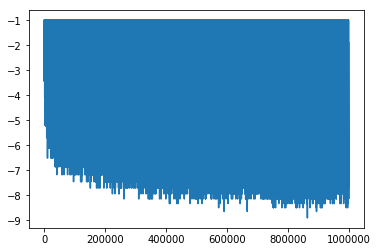

In [84]:
import itertools
env = Env("../asset/map-ex5-11-2.csv")
actions = list(itertools.product(Action, Action))
mcc = MonteCarloControler(actions)
mcc.eps = 0.1
mcc.discount = 0.9
n_episodes = 1000000
rs = []
for i in range(n_episodes):
    r, goal = mcc.update_episode(env)
    rs.append(r)
    if i % 10000 == 0:
        print(numpy.mean(rs))
    if goal:
        print("cross the goal!")
pyplot.plot(range(n_episodes), rs)

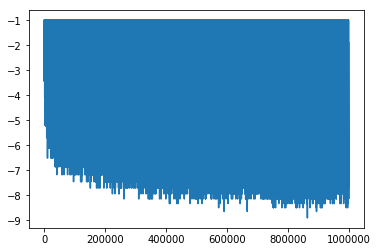

In [85]:
pyplot.plot(range(n_episodes), rs)